# Student Performance Prediction using Supervised Machine Learning

This project aims to predict students' academic performance based on
educational and social factors using supervised machine learning models.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix


In [23]:
print('Listing files and directories in the current working directory:')
!ls

Listing files and directories in the current working directory:
sample_data  student_performance.zip  student.zip


```markdown
The `!ls -R` command is a shell command that lists the contents of the current directory and recursively lists the contents of its subdirectories. This provides a comprehensive overview of the file system structure within the current working directory.
```

In [24]:
print('Listing files and directories in the current working directory and its subdirectories recursively:')
!ls -R

Listing files and directories in the current working directory and its subdirectories recursively:
.:
sample_data  student_performance.zip  student.zip

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


## Locate student-mat.csv

### Subtask:
Locate the 'student-mat.csv' file within the current directory and its subdirectories using the `!find` command.


**Reasoning**:
Execute the `!find` command to locate the 'student-mat.csv' file within the current directory and its subdirectories, as instructed.



In [25]:
!find . -name "student-mat.csv"

**Reasoning**:
The previous `!find` command did not locate 'student-mat.csv', which indicates it might be nested within the `student.zip` file that was extracted from `student_performance.zip`. To access the CSV files, `student.zip` needs to be unzipped.



In [26]:
print('Unzipping student.zip to extract the CSV files:')
!unzip -o student.zip

Unzipping student.zip to extract the CSV files:
Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


**Reasoning**:
Now that 'student.zip' has been unzipped, I need to execute the `!find` command again to locate 'student-mat.csv' within the current directory and its subdirectories, confirming its presence after extraction.



In [27]:
print("Locating 'student-mat.csv' after unzipping:")
!find . -name "student-mat.csv"

Locating 'student-mat.csv' after unzipping:
./student-mat.csv


**Reasoning**:
Now that the 'student-mat.csv' file has been successfully located, the next step is to load it into a pandas DataFrame as instructed by the main task. I will use `pd.read_csv` with the correct separator to load the data.



In [28]:
print('Loading student-mat.csv into a pandas DataFrame:')
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

Loading student-mat.csv into a pandas DataFrame:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


**Reasoning**:
Now that the data is loaded, I need to identify which columns are categorical and which are numerical to proceed with handling categorical features and scaling numerical features as per the main task. Inspecting the DataFrame's info and data types is the first logical step.



In [29]:
print('Displaying DataFrame information to identify data types:')
df.info()

Displaying DataFrame information to identify data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    objec

**Reasoning**:
Based on the `df.info()` output, I will now explicitly separate the DataFrame columns into categorical and numerical lists. This is a crucial step before applying one-hot encoding to categorical features and scaling to numerical features, as required by the main task.



In [30]:
print('Separating columns into categorical and numerical lists:')
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical columns: {list(categorical_cols)}")
print(f"Numerical columns: {list(numerical_cols)}")

Separating columns into categorical and numerical lists:
Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Numerical columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


**Reasoning**:
Now that the categorical and numerical columns have been identified, I will apply one-hot encoding to the categorical features using `pd.get_dummies`. This will convert the categorical variables into a format suitable for machine learning models, as specified by the main task.



In [31]:
print('Applying one-hot encoding to categorical features:')
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

Applying one-hot encoding to categorical features:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


**Reasoning**:
Now that categorical features are one-hot encoded, I will apply StandardScaler to the numerical features to ensure they are on a similar scale, which is important for many machine learning models. I will create a new DataFrame for the scaled numerical features and then concatenate it with the encoded categorical features.



In [32]:
print('Applying StandardScaler to numerical features:')
scaler = StandardScaler()
df_scaled_numerical = pd.DataFrame(scaler.fit_transform(df_encoded[numerical_cols]), columns=numerical_cols)

# Drop original numerical columns from df_encoded and concatenate with scaled numerical columns
df_processed = pd.concat([
    df_scaled_numerical,
    df_encoded.drop(columns=numerical_cols).reset_index(drop=True)
], axis=1)

print('Processed DataFrame head:')
df_processed.head()

Applying StandardScaler to numerical features:
Processed DataFrame head:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,...,True,False,True,False,False,False,True,True,False,False
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,...,False,False,False,True,False,False,False,True,True,False
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,...,True,False,True,False,True,False,True,True,True,False
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,...,True,False,False,True,True,True,True,True,True,True
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,...,False,False,False,True,True,False,True,True,False,False


## Identify Features and Target

### Subtask:
Identify the features (X) and the target variable (y) for the Linear Regression model, designating 'G3' as the target variable and separating them into respective DataFrames.


**Reasoning**:
I will define the target variable `y` as the 'G3' column and the features `X` as all other columns from the `df_processed` DataFrame, then display the first five rows of both `X` and `y` to confirm the separation, as per the instructions.



In [33]:
print("Defining target variable 'y' and feature DataFrame 'X':")
y = df_processed['G3']
X = df_processed.drop('G3', axis=1)

print('\nFirst 5 rows of X (Features):')
print(X.head())

print('\nFirst 5 rows of y (Target - G3):')
print(y.head())

Defining target variable 'y' and feature DataFrame 'X':

First 5 rows of X (Features):
        age      Medu      Fedu  traveltime  studytime  failures    famrel  \
0  1.023046  1.143856  1.360371    0.792251  -0.042286 -0.449944  0.062194   
1  0.238380 -1.600009 -1.399970   -0.643249  -0.042286 -0.449944  1.178860   
2 -1.330954 -1.600009 -1.399970   -0.643249  -0.042286  3.589323  0.062194   
3 -1.330954  1.143856 -0.479857   -0.643249   1.150779 -0.449944 -1.054472   
4 -0.546287  0.229234  0.440257   -0.643249  -0.042286 -0.449944  0.062194   

   freetime     goout      Dalc  ...  guardian_mother  guardian_other  \
0 -0.236010  0.801479 -0.540699  ...             True           False   
1 -0.236010 -0.097908 -0.540699  ...            False           False   
2 -0.236010 -0.997295  0.583385  ...             True           False   
3 -1.238419 -0.997295 -0.540699  ...             True           False   
4 -0.236010 -0.997295 -0.540699  ...            False           False   

   sc

## Summary:

### Data Analysis Key Findings

*   The `student-mat.csv` dataset was successfully located and loaded into a pandas DataFrame after being unzipped from `student.zip`. The dataset was read using a semicolon (`;`) as a separator.
*   The initial dataset comprised 33 columns, consisting of 17 categorical features (object data type) and 16 numerical features (integer data type).
*   Categorical features were transformed using one-hot encoding with `pd.get_dummies(drop_first=True)`, successfully handling nominal data and avoiding multicollinearity. This process expanded the feature set.
*   Numerical features were scaled using `StandardScaler`, ensuring that all numerical inputs have a mean of 0 and a standard deviation of 1, which is beneficial for many machine learning algorithms, including Linear Regression.
*   The processed dataset (`df_processed`), containing both scaled numerical and one-hot encoded categorical features, was successfully divided into features (`X`) and the target variable (`y`), with 'G3' designated as the target. The `X` DataFrame contains 41 features.

### Insights or Next Steps

*   The dataset is now thoroughly prepared, with all categorical variables appropriately encoded and numerical variables scaled, making it immediately ready for training a Linear Regression model.
*   The next critical step is to split the `X` and `y` data into training and testing sets to evaluate the model's performance on unseen data, followed by model training and evaluation.


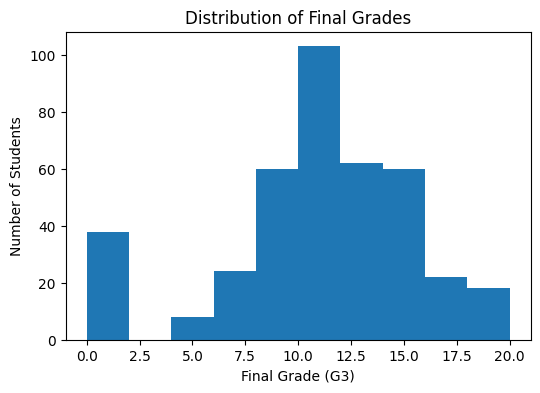

In [34]:
plt.figure(figsize=(6,4))
plt.hist(df["G3"], bins=10)
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final Grades")
plt.show()


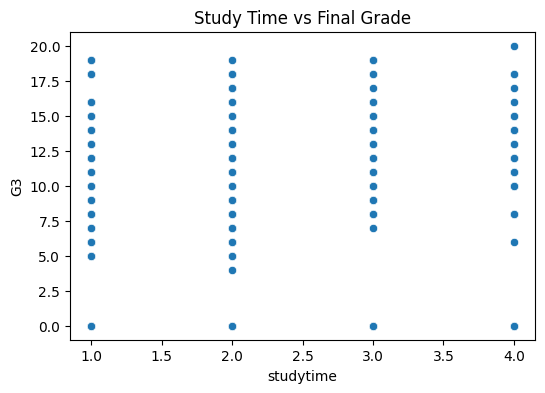

In [36]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="studytime", y="G3", data=df)
plt.title("Study Time vs Final Grade")
plt.show()


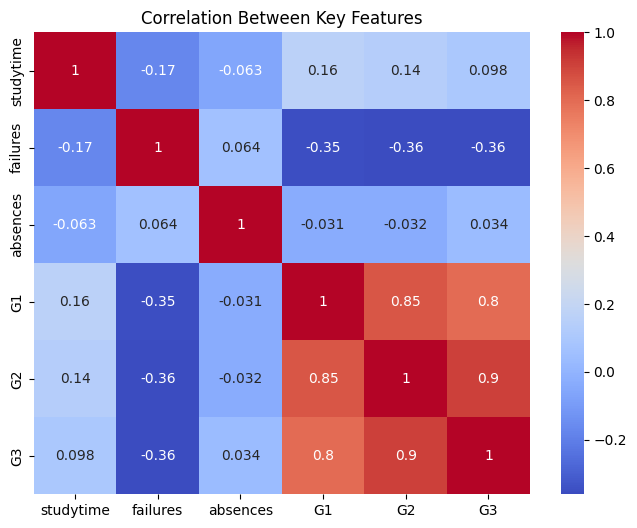

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["studytime","failures","absences","G1","G2","G3"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Between Key Features")
plt.show()


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


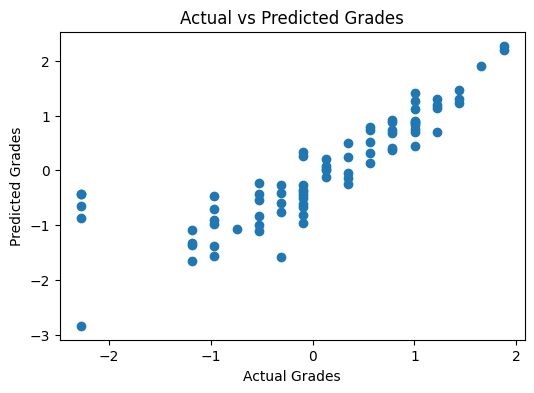

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Grades")
plt.show()
